In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [144]:
df1=pd.read_csv("Ahmedabad_rent.csv")
df2=pd.read_csv("Bangalore_rent.csv")
df3=pd.read_csv("Chennai_rent.csv")
df4=pd.read_csv("Delhi_rent.csv")
df5=pd.read_csv("Hyderabad_rent.csv")
df6=pd.read_csv("Kolkata_rent.csv")
df7=pd.read_csv("Mumbai_rent.csv")
df8=pd.read_csv("Pune_rent.csv")


In [145]:
df1['city']="Ahmedabad"
df2['city']="Bangalore"
df3['city']="Chennai"
df4['city']="Delhi"
df5['city']="Hyderabad"
df6['city']="Kolkata"
df7['city']="Mumbai"
df8['city']="Pune"


In [146]:
df3.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city'],
      dtype='object')

In [147]:
df2.head(1)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2,BHK,Independent Floor,kamakshipalya,"20,000",1140,Semi-Furnished,2 bathrooms,Bangalore


In [148]:
dfs=[df1,df2,df3,df4,df5,df6,df7,df8]

In [149]:
df=pd.concat(dfs)
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,"20,000",1450.0,Furnished,2 bathrooms,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,"7,350",210.0,Semi-Furnished,1 bathrooms,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,"22,000",1900.0,Unfurnished,3 bathrooms,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,"13,000",1285.0,Semi-Furnished,2 bathrooms,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,"18,000",1600.0,Furnished,2 bathrooms,Ahmedabad


In [150]:
df.tail()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
22795,OWNER,1.0,BHK,Apartment,Chinchwad,"13,250",650.0,Semi-Furnished,1 bathrooms,Pune
22796,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,"7,000",350.0,Unfurnished,1 bathrooms,Pune
22797,OWNER,1.0,BHK,Apartment,Kothrud,"8,500",389.0,Semi-Furnished,1 bathrooms,Pune
22798,AGENT,1.0,BHK,Apartment,Wakad,"16,500",670.0,Semi-Furnished,2 bathrooms,Pune
22799,AGENT,2.0,BHK,Apartment,Alandi,"12,000",800.0,Unfurnished,2 bathrooms,Pune


In [151]:
df.shape

(196838, 10)

In [152]:
df.isnull().sum()

seller_type      1064
bedroom          1061
layout_type      1061
property_type    1061
locality         1062
price            1061
area             1061
furnish_type     1061
bathroom         3358
city                0
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196838 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    195774 non-null  object 
 1   bedroom        195777 non-null  float64
 2   layout_type    195777 non-null  object 
 3   property_type  195777 non-null  object 
 4   locality       195776 non-null  object 
 5   price          195777 non-null  object 
 6   area           195777 non-null  float64
 7   furnish_type   195777 non-null  object 
 8   bathroom       193480 non-null  object 
 9   city           196838 non-null  object 
dtypes: float64(2), object(8)
memory usage: 16.5+ MB


In [154]:
df.isnull().sum()

seller_type      1064
bedroom          1061
layout_type      1061
property_type    1061
locality         1062
price            1061
area             1061
furnish_type     1061
bathroom         3358
city                0
dtype: int64

In [155]:
df[df["seller_type"].isnull()].head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
6440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
6441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
6442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
6443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chennai
6444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chennai


In [156]:
df[df["seller_type"].isnull()].shape

(1064, 10)

In [157]:
df.head(2)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,"20,000",1450.0,Furnished,2 bathrooms,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,"7,350",210.0,Semi-Furnished,1 bathrooms,Ahmedabad


# Handling Missing Values

In [158]:
df['bathroom'] = df['bathroom'].astype(str)
df['bathroom'] = df['bathroom'].str.extract('(\d+)').astype(float)
mean_value = df['bathroom'].mean(skipna=True)
df['bathroom'].fillna(mean_value, inplace=True)
df['bathroom'] = df['bathroom'].astype(int)

In [159]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,"20,000",1450.0,Furnished,2,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,"7,350",210.0,Semi-Furnished,1,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,"22,000",1900.0,Unfurnished,3,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,"13,000",1285.0,Semi-Furnished,2,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,"18,000",1600.0,Furnished,2,Ahmedabad


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196838 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    195774 non-null  object 
 1   bedroom        195777 non-null  float64
 2   layout_type    195777 non-null  object 
 3   property_type  195777 non-null  object 
 4   locality       195776 non-null  object 
 5   price          195777 non-null  object 
 6   area           195777 non-null  float64
 7   furnish_type   195777 non-null  object 
 8   bathroom       196838 non-null  int32  
 9   city           196838 non-null  object 
dtypes: float64(2), int32(1), object(7)
memory usage: 15.8+ MB


In [161]:
# handling missing values for bedroom
mean = df['bedroom'].mean(skipna=True)
df['bedroom'].fillna(mean, inplace=True)
df['bedroom'] = df['bedroom'].astype(int)

In [162]:
df.head(1)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2,BHK,Apartment,Bodakdev,"20,000",1450.0,Furnished,2,Ahmedabad


In [163]:
#Handling missing values for area
mean = df['area'].mean(skipna=True)
df['area'].fillna(mean, inplace=True)
df['area'] = df['area'].astype(int)

In [167]:
#Handling missing values for price
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace(',', '').astype(float)
mean_value = df['price'].mean(skipna=True)
df['price'].fillna(mean_value, inplace=True)
df['price'] = df['price'].astype(int)

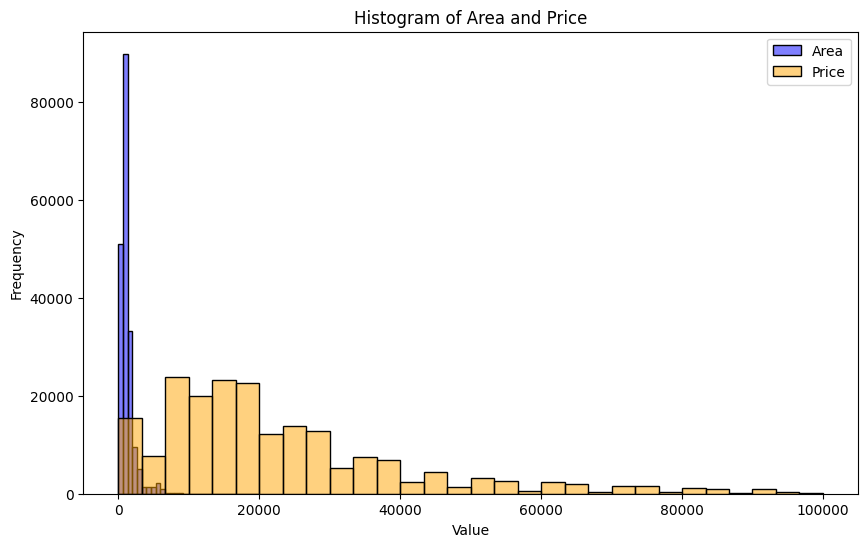

In [200]:
plt.figure(figsize=(10, 6))

sns.histplot(df['area'], bins=30, color='blue', alpha=0.5, label='Area')
sns.histplot(df['price'], bins=30, color='orange', alpha=0.5, label='Price')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Area and Price')
plt.legend()
plt.show()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196838 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   seller_type    195774 non-null  object
 1   bedroom        196838 non-null  int32 
 2   layout_type    195777 non-null  object
 3   property_type  195777 non-null  object
 4   locality       195776 non-null  object
 5   price          196838 non-null  int32 
 6   area           196838 non-null  int32 
 7   furnish_type   195777 non-null  object
 8   bathroom       196838 non-null  int32 
 9   city           196838 non-null  object
dtypes: int32(4), object(6)
memory usage: 13.5+ MB


In [169]:
df.head(1)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2,BHK,Apartment,Bodakdev,20000,1450,Furnished,2,Ahmedabad


In [171]:
df.describe()

,bedroom,price,area,bathroom
count,196838.000000,196838.000000,196838.000000,196838.000000
mean,2.077048,22736.242306,1260.519839,2.059409
std,0.954753,17997.094016,1037.852533,0.929336
min,1.000000,1.000000,3.000000,1.000000
25%,1.000000,11000.000000,650.000000,1.000000
50%,2.000000,18000.000000,1000.000000,2.000000
75%,3.000000,30000.000000,1426.750000,2.000000
max,15.000000,99999.000000,19800.000000,19.000000


In [172]:
df.isnull().sum()

seller_type      1064
bedroom             0
layout_type      1061
property_type    1061
locality         1062
price               0
area                0
furnish_type     1061
bathroom            0
city                0
dtype: int64

<Axes: >

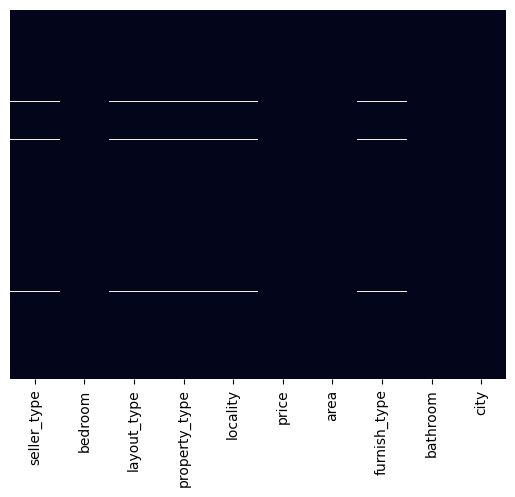

In [183]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [191]:
#Handling missing values for categorical variables
df['seller_type']=df['seller_type'].fillna(df['seller_type'].mode()[0])
df['layout_type']=df['layout_type'].fillna(df['layout_type'].mode()[0])
df['property_type']=df['property_type'].fillna(df['property_type'].mode()[0])
df['locality']=df['locality'].fillna(df['locality'].mode()[0])
df['furnish_type']=df['furnish_type'].fillna(df['furnish_type'].mode()[0])

In [192]:
df.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
city             0
dtype: int64

<Axes: >

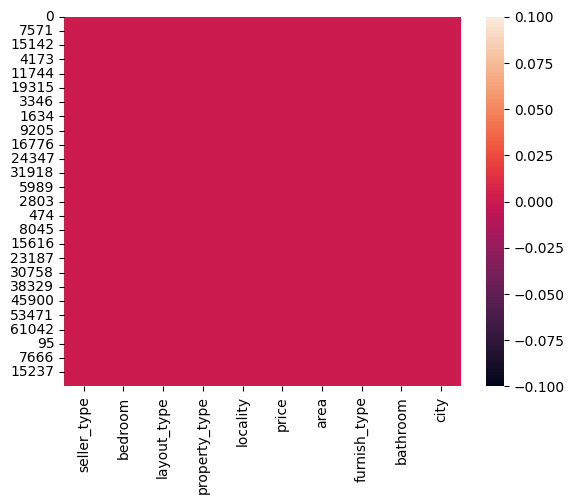

In [196]:
sns.heatmap(df.isnull())

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196838 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   seller_type    196838 non-null  object
 1   bedroom        196838 non-null  int32 
 2   layout_type    196838 non-null  object
 3   property_type  196838 non-null  object
 4   locality       196838 non-null  object
 5   price          196838 non-null  int32 
 6   area           196838 non-null  int32 
 7   furnish_type   196838 non-null  object
 8   bathroom       196838 non-null  int32 
 9   city           196838 non-null  object
dtypes: int32(4), object(6)
memory usage: 13.5+ MB


In [206]:
df.seller_type.unique()

array(['OWNER', 'AGENT', 'BUILDER'], dtype=object)

# Ordinal Encoding

In [208]:
df.layout_type.unique()

array(['BHK', 'RK'], dtype=object)

In [210]:
df.property_type.unique()

array(['Apartment', 'Studio Apartment', 'Independent House', 'Villa',
       'Independent Floor', 'Penthouse'], dtype=object)

In [215]:
import category_encoders as ce

In [216]:
encoder = ce.TargetEncoder(cols=['locality'])

encoder.fit(df['locality'], df['price'])
df['locality_encoded'] = encoder.transform(df['locality'], df['price'])


In [221]:
df.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,locality_encoded,city_encoded
0,OWNER,2,BHK,Apartment,20000,1450,Furnished,2,28877.514029,22404.599245
1,OWNER,1,RK,Studio Apartment,7350,210,Semi-Furnished,1,23789.037658,22404.599245
2,OWNER,3,BHK,Apartment,22000,1900,Unfurnished,3,24606.076170,22404.599245
3,OWNER,2,BHK,Independent House,13000,1285,Semi-Furnished,2,16180.592652,22404.599245
4,OWNER,2,BHK,Independent House,18000,1600,Furnished,2,26669.834888,22404.599245


In [218]:
df.drop(columns=['locality'], inplace=True)

In [223]:
df.furnish_type.unique()

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [220]:
encoder = ce.TargetEncoder(cols=['city'])

encoder.fit(df['city'], df['price'])
df['city_encoded'] = encoder.transform(df['city'], df['price'])
df.drop(columns=['city'], inplace=True)

In [226]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [227]:
X=df.drop(labels=["price"],axis=1)
y=df["price"]

In [230]:
cat_cols=X.select_dtypes(include="object").columns

num_cols=X.select_dtypes(exclude="object").columns

In [231]:
cat_cols

Index(['seller_type', 'layout_type', 'property_type', 'furnish_type'], dtype='object')

In [232]:
num_cols

Index(['bedroom', 'area', 'bathroom', 'locality_encoded', 'city_encoded'], dtype='object')

In [233]:
X.select_dtypes(include="object").head()

,seller_type,layout_type,property_type,furnish_type
0,OWNER,BHK,Apartment,Furnished
1,OWNER,RK,Studio Apartment,Semi-Furnished
2,OWNER,BHK,Apartment,Unfurnished
3,OWNER,BHK,Independent House,Semi-Furnished
4,OWNER,BHK,Independent House,Furnished


In [234]:
X["property_type"].value_counts()

property_type
Apartment            142916
Independent Floor     27696
Independent House     13125
Studio Apartment       9789
Villa                  3156
Penthouse               156
Name: count, dtype: int64

In [238]:
seller={"OWNER":1,"AGENT":2,"BUILDER":3}
layout={"RK":1,"BHK":2}
property={'Studio Apartment': 1,'Apartment': 2,'Independent Floor': 3,'Independent House': 4,'Villa': 5,'Penthouse': 6}
furnished = {'Unfurnished': 1,'Semi-Furnished': 2,'Furnished': 3}

In [241]:
sell_cat=['OWNER', 'AGENT', 'BUILDER']
layout_cat=['BHK', 'RK']
property_cat=['Apartment', 'Studio Apartment', 'Independent House', 'Villa','Independent Floor', 'Penthouse']
furnished_cat=['Furnished', 'Semi-Furnished', 'Unfurnished']

In [239]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [242]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[sell_cat,layout_cat,property_cat,furnished_cat]))

    ]
)

In [243]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

In [244]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [245]:
X_train.head()

,seller_type,bedroom,layout_type,property_type,area,furnish_type,bathroom,locality_encoded,city_encoded
8328,AGENT,1,BHK,Apartment,466,Unfurnished,1,20511.477912,17224.154141
7024,AGENT,2,BHK,Apartment,1300,Semi-Furnished,2,20987.635117,19833.394180
19260,OWNER,2,BHK,Independent House,1000,Semi-Furnished,1,15502.779792,19833.394180
8456,AGENT,4,BHK,Independent Floor,3600,Semi-Furnished,4,38104.344429,19304.005881
20352,OWNER,1,BHK,Independent Floor,450,Semi-Furnished,1,24937.276102,19833.394180


In [246]:
y_train.head()

8328      7500
7024     20000
19260    14000
8456         1
20352    14500
Name: price, dtype: int32

In [247]:
preprocessor.fit_transform(X_train)

array([[-1.12816621, -0.76703309, -1.13902926, ...,  0.        ,
         0.        ,  2.        ],
       [-0.08011768,  0.03812628, -0.06296181, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08011768, -0.25149939, -1.13902926, ...,  0.        ,
         2.        ,  1.        ],
       ...,
       [-0.08011768, -0.17426588, -0.06296181, ...,  0.        ,
         0.        ,  2.        ],
       [-0.08011768, -0.23219102, -0.06296181, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12816621, -0.75351722, -1.13902926, ...,  0.        ,
         0.        ,  1.        ]])

In [248]:
preprocessor.transform(X_test)

array([[-0.08011768, -0.0371764 , -0.06296181, ...,  0.        ,
         0.        ,  2.        ],
       [-0.08011768,  0.08639722, -0.06296181, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.0640279 ,  1.6793384 ,  3.16524055, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.12816621, -0.49285412, -0.06296181, ...,  0.        ,
         0.        ,  2.        ],
       [-0.08011768, -0.20322845, -0.06296181, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08011768, -0.25149939, -0.06296181, ...,  0.        ,
         0.        ,  0.        ]])

In [249]:
preprocessor.get_feature_names_out()

array(['num_pipeline__bedroom', 'num_pipeline__area',
       'num_pipeline__bathroom', 'num_pipeline__locality_encoded',
       'num_pipeline__city_encoded', 'cat_pipeline__seller_type',
       'cat_pipeline__layout_type', 'cat_pipeline__property_type',
       'cat_pipeline__furnish_type'], dtype=object)

In [250]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [251]:
X_train

,num_pipeline__bedroom,num_pipeline__area,num_pipeline__bathroom,num_pipeline__locality_encoded,num_pipeline__city_encoded,cat_pipeline__seller_type,cat_pipeline__layout_type,cat_pipeline__property_type,cat_pipeline__furnish_type
0,-1.128166,-0.767033,-1.139029,-0.257149,-1.172723,1.0,0.0,0.0,2.0
1,-0.080118,0.038126,-0.062962,-0.208721,-0.616231,1.0,0.0,0.0,1.0
2,-0.080118,-0.251499,-1.139029,-0.766567,-0.616231,0.0,0.0,2.0,1.0
3,2.015979,2.258590,2.089173,1.532161,-0.729137,1.0,0.0,4.0,1.0
4,-1.128166,-0.782480,-1.139029,0.192984,-0.616231,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...
137781,-0.080118,-0.477407,-0.062962,1.151516,1.329907,1.0,0.0,0.0,2.0
137782,-1.128166,-0.618359,-1.139029,-0.429845,-1.172723,0.0,0.0,3.0,2.0
137783,-0.080118,-0.174266,-0.062962,0.180696,1.329907,1.0,0.0,0.0,2.0
137784,-0.080118,-0.232191,-0.062962,1.292322,1.329907,1.0,0.0,0.0,1.0


In [252]:
X_test

,num_pipeline__bedroom,num_pipeline__area,num_pipeline__bathroom,num_pipeline__locality_encoded,num_pipeline__city_encoded,cat_pipeline__seller_type,cat_pipeline__layout_type,cat_pipeline__property_type,cat_pipeline__furnish_type
0,-0.080118,-0.037176,-0.062962,-0.130825,-0.836041,1.0,0.0,0.0,2.0
1,-0.080118,0.086397,-0.062962,-0.401372,-0.836041,1.0,0.0,0.0,0.0
2,3.064028,1.679338,3.165241,1.155947,1.329907,1.0,0.0,0.0,0.0
3,0.967931,0.327752,1.013106,1.245888,-0.067851,1.0,0.0,0.0,0.0
4,0.967931,0.612551,1.013106,-0.176237,-0.067851,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
59047,-0.080118,-0.058416,-0.062962,0.430942,1.329907,0.0,0.0,2.0,2.0
59048,-1.128166,-0.637667,-1.139029,0.316088,-0.836041,1.0,0.0,0.0,2.0
59049,-1.128166,-0.492854,-0.062962,2.457266,1.329907,1.0,0.0,0.0,2.0
59050,-0.080118,-0.203228,-0.062962,2.071727,1.329907,1.0,0.0,0.0,1.0


# Model Traning

In [253]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [254]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [255]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [256]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost']

In [257]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [258]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost'])

In [259]:
list(models.values())[1]

Lasso()

In [260]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [261]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 193009920.78730756
MAE: 8610.025138288718
R2 SCORE: 0.40858824661262627


model training performance Lasso()
MSE: 193009925.68757045
MAE: 8609.64102217085
R2 SCORE: 0.4085882315974755


model training performance Ridge()
MSE: 193009887.33608395
MAE: 8610.006132277478
R2 SCORE: 0.40858834911226316


model training performance ElasticNet()
MSE: 209651455.83080798
MAE: 9346.9014646549
R2 SCORE: 0.35759605212341317


model training performance RandomForestRegressor()
MSE: 74688226.38065544
MAE: 3687.9203145869633
R2 SCORE: 0.7711439145666896


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=

In [262]:
r2_list

[0.40858824661262627,
 0.4085882315974755,
 0.40858834911226316,
 0.35759605212341317,
 0.7711439145666896,
 0.6970592875898619]

In [268]:
print(f"RandomForest: {max(r2_list)*100:.2f}")

RandomForest: 77.11


# Pickle the machine learning Model & Standardscaler

In [270]:
StandardScaler()

StandardScaler()

In [271]:
RandomForestRegressor()

RandomForestRegressor()

In [272]:
import pickle
pickle.dump(StandardScaler(),open('scaler.pkl','wb'))
pickle.dump(RandomForestRegressor(),open('RF.pkl','wb'))

In [5]:
df=pd.read_csv('States.csv')

In [8]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [9]:
df.shape

(193011, 10)